# Maticové grafy

Grafy pre zobrazenie matíc (*matrix plot*) môžeme použiť na zobrazenie dát v podobe farebne škálovanej matice. Môžeme ich preto použiť na zistenie prípadných klastrov dát bez toho, aby sme použili nejakú metódu strojového učenia pre identifikáciu klastrov. Podrobnejšie sa o parametroch dozvieme na stránke https://seaborn.pydata.org/generated/seaborn.heatmap.html.


In [1]:
import seaborn as sns
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Tentokrát použijeme okrem datasetu tips aj dataset flights.

In [2]:
flights = sns.load_dataset('flights')

In [3]:
tips = sns.load_dataset('tips')

Pozrieme sa, ako vyzerajú dáta v oboch datasetoch.

In [4]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [5]:
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

## Heatmap

Teplotná mapa (*heatmap*) vyžduje, aby vstupné údaje mali formu matice. Teplotná mapa potom nahradí jednotlivé hodnoty ich farebnou reprezentáciou.

In [6]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Keďže dáta musia mať tvar matice, zmysel má porovnať len mieru korelácie medzi číselnými atribútmi datasetu. Vidíme istú pozitívnu koreláciu medzi atribútmi *total_bill* a *tip*.

In [7]:
tips.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

Parameter *cmap* určuje farebnú škálu. Nadobúda hodnoty, ktoré nájdeme na stránke https://matplotlib.org/users/colormaps.html. Parameter *center* určuje, okolo ktorej hodnoty sa farebná škála vycentruje.

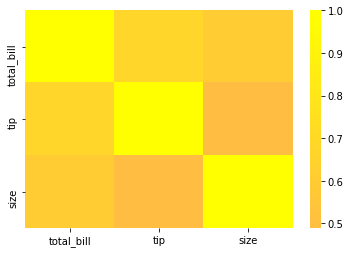

In [8]:
sns.heatmap(tips.corr(), cmap ='spring', center= 0.0)

Často je však užitočnejšie, ak súčasťou matice sú aj jednotlivé hodnoty korelačného koeficientu. Tie pridáme parametrom *annot*.

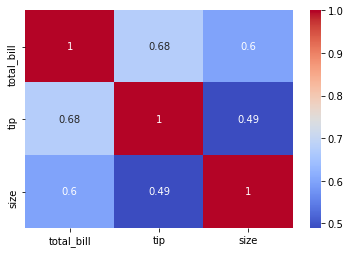

In [9]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

V reálnych prípadoch potrebujeme dáta upraviť do vhodného tvaru. Napríklad, aby sme mohli dáta zobraziť v podobe matice, musíme ich väčšinou trasformovať do podoby kontingenčnej tabuľky. V nasledujúcom príklade tabuľka zobrazuje počet pasažierov prepravených v jednotlivých mesiacoch a rokoch.

In [18]:
flights.pivot_table(values='passengers',index='month',columns='year')

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

Následne ich môžeme vizualizovať vo forme teplotnej mapy.

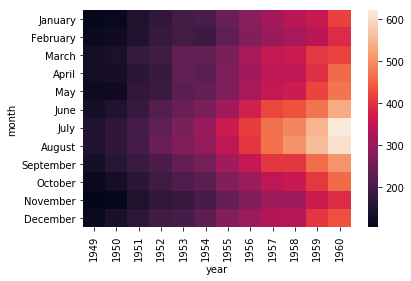

In [21]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

A pohrať sa s ďalšími parametrami, napríklad s farbou a hrúbkou čiary medzi hodnotami. Vidíme rastúci poet pasažierov s rokmi, pričom maximum dosahovali v letných mesiacoch. 

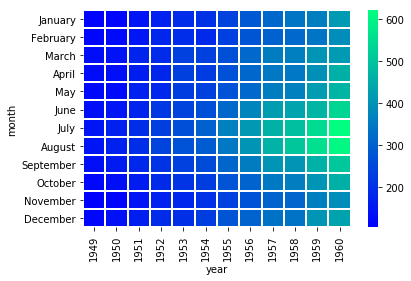

In [12]:
sns.heatmap(pvflights,cmap='winter',linecolor='white',linewidths=1)

## clustermap

Pomocou knižnice *seaborn* môžeme vytvoriť klastre dát. Použijeme pritom algoritmus hierarchického klastrovania (zhlukovania). Pôvodná teplotná mapa sa tak zmení na kluster dát, v ktorom sú dáta zoskupené na základe podobnosti.

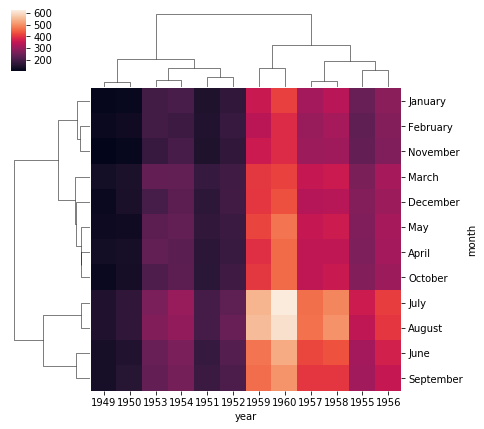

In [13]:
sns.clustermap(pvflights, figsize=(7,7))

Znova môžeme experimentovať s rôznymi parametrami, ktorých význam sme si už osvojili (https://seaborn.pydata.org/generated/seaborn.clustermap.html).

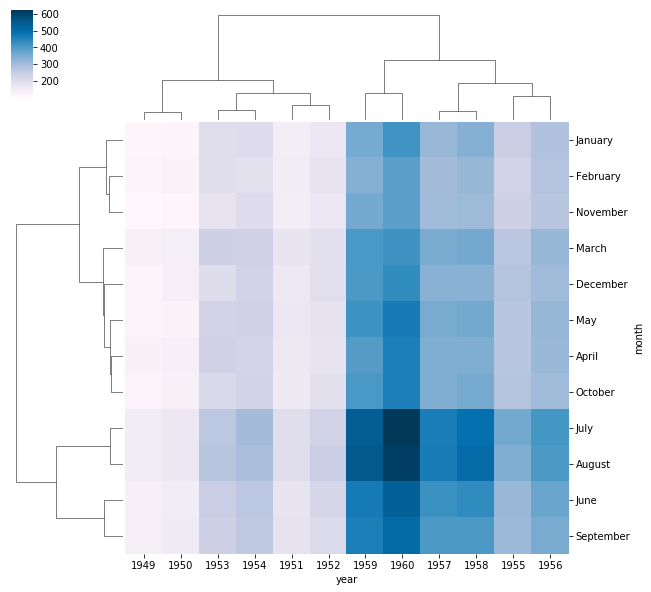

In [14]:
sns.clustermap(pvflights, cmap='PuBu')

Z pohľadu klastrov je dôležité vedieť, akú sme použili metriku alebo metódu pre výpočet klastrov. Viac sa o nich dozvieme neskôr, podrobnosti ale nájdeme aj na stránkach nápovedy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html a https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html.

Všimnime si, že roky a mesiace už nie sú v chronologickom poradí, ale sú zoskupené podľa podobnosti hodnôt, v našom prípade na základe podobného počtu pasažierov. Aby sme zohľadnili rozdiely v rozsahoch, ktoré nadobúdajú porovnávané atribúty, často potrebujeme dáta normalizovať na škálu 0,1. Použijeme parameter *standard_scale*.

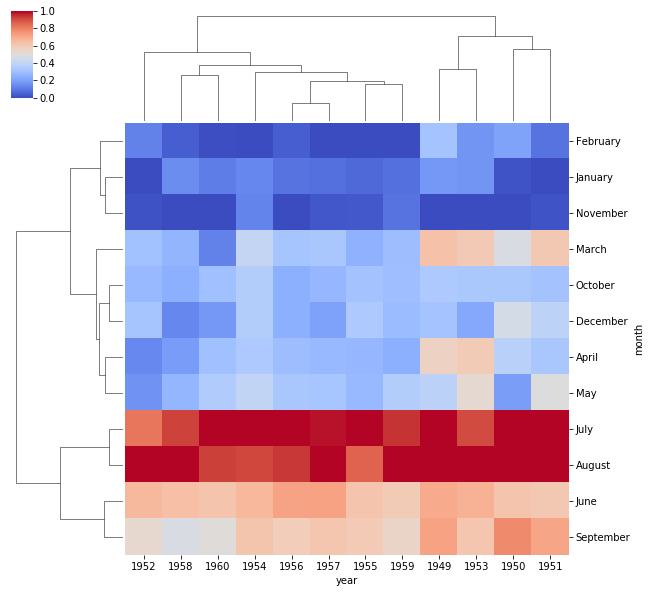

In [15]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

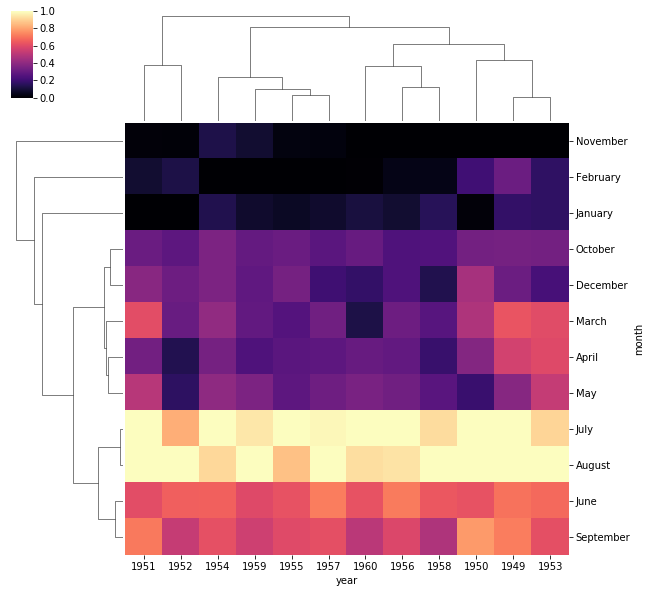

In [16]:
sns.clustermap(pvflights,cmap='magma',standard_scale=1, metric='canberra' )